# DFT, Windowing, Spectrograms

### Package installation instructions
Open terminal and install using following commands:

-  conda install -c conda-forge librosa
-  conda install numpy
-  conda install scipy


In [1]:
import numpy as np
import librosa
import librosa.display
import scipy

In [2]:
import matplotlib.pyplot as plt
import IPython.display as ipd

## Motivational Example
  Here is an example of a speech and music signals. We can listen to it and distinguish that they are different. 
  
  Is it possible to visualize these signals? How can we make machines understand the differences? 
  
  Let us look at a the tools that make this possible.

In [3]:
ipd.Audio('audio/allison.wav')

In [4]:
ipd.Audio('audio/classical.wav')

## Discrete Fourier Transform (DFT)
Source [1]

Let $x\in \mathbb{C}^N$ be a vector of length $N\in\mathbb{N}$. In the music signal context, $x$ can be interpreted as a discrete signal with samples $x(0), x(1), ..., x(N-1)$. Note that we start indexing with the index $0$. The **Discrete Fourier Transform** (DFT) of $x$ is defined by:

$$ X(k) := \sum_{n=0}^{N-1} x(n) \exp(-2 \pi i k n / N) $$

for $k \in [0:N-1]$. The vector $X\in\mathbb{C}^N$ can be interpreted as frequency representation of the time-domain signal $x$.   To obtain a geometric interpretation of the DFT, we define the a vector $\mathbf{u}_k\in\mathbb{C}^N$ by

$$\mathbf{u}_k(n) :=  \exp(2 \pi i k n / N) = \cos(2 \pi i k n / N) + i \sin(2 \pi i k n / N)$$

for each $k \in [0:N-1]$. This vector can be regarded as a sampled version of the exponential function of frequency $k/N$. Then, the DFT can be expressed as inner products

$$ X(k) := \sum_{n=0}^{N-1} x(n) \overline{\mathbf{u}_k} = \langle x | \mathbf{u}_k \rangle$$

of the signal $x$ and the sampled exponential functions $\mathbf{u}_k$. The absolute value $|X(k)|$ indicates the degree of similarity between the signal $x$ and $\mathbf{u}_k$. 


Any signal can be represented as sum of sinusoidal signals. DFT tells us which sinusoids are present in a signal and by what amount, providing us with easy to interpret visual representation of the signal.
FFT is fast version of DFT deviced using observations of structures present in the DFT.

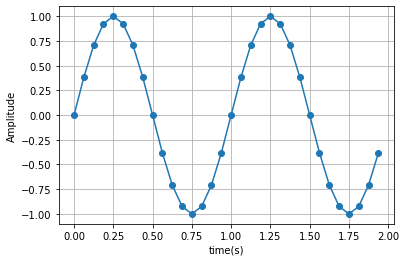

In [5]:
# sine wav parameters
Fs = 16          
f = 1            
duration = 2     
amplitude = 1
t = np.linspace(0, duration, int(duration*Fs), endpoint=False) # time variable
x = amplitude*np.sin(2*np.pi*f*t)                # sine wave at 1 Hz

# Plot sine wave
plt.plot(t, x, '-o')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.grid(True)

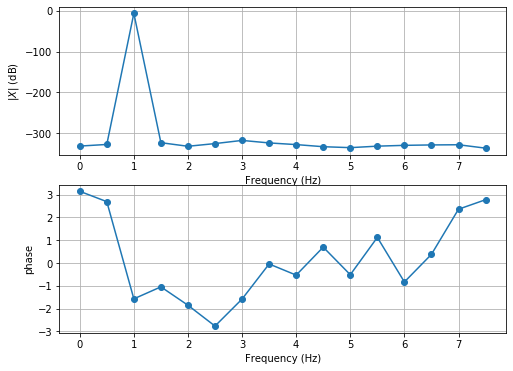

In [6]:
# Compute FFT of the sine wave
N = int(duration * Fs)
fft_mag = np.abs(np.fft.fft(x)) / N
fft_phase = np.angle(np.fft.fft(x))
freqs = np.fft.fftfreq(N, d=1/Fs)
fft_mag = fft_mag[:N//2]
fft_phase = fft_phase[:N//2]
freqs = freqs[:N//2]
fft_mag_db = 20 * np.log10(fft_mag)

# Plot the sine wave and FFT
plt.figure(figsize=(8, 6))

plt.subplot(2,1,1)
plt.plot(freqs, fft_mag_db, '-o')
plt.ylabel('$|X|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(freqs, fft_phase, '-o')
plt.ylabel('phase')
plt.xlabel('Frequency (Hz)')
plt.grid(True)

### Visualize addition of 2 sine waves and its DFT

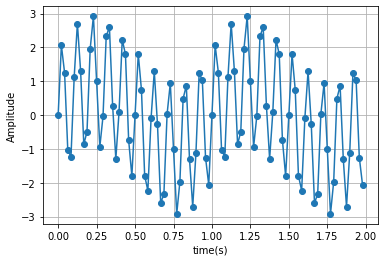

In [7]:
Fs = 48          
f1 = 1 
f2 = 10
duration = 2     
amplitude1 = 1
amplitude2 = 2
t = np.linspace(0, duration, int(duration*Fs), endpoint=False) # time variable
x = amplitude1*np.sin(2*np.pi*f1*t) + amplitude2*np.sin(2*np.pi*f2*t)         # sine wave at 1 Hz and 5 Hz

plt.plot(t, x, '-o')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.grid(True)

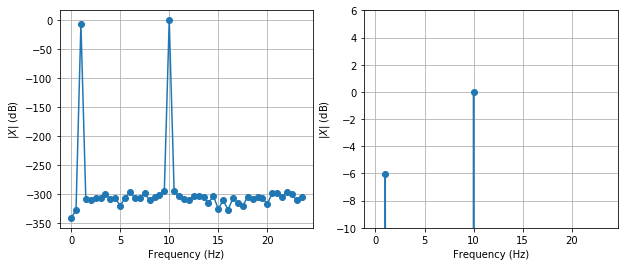

In [8]:
N = int(duration * Fs)
fft_mag = np.abs(np.fft.fft(x)) / N
fft_phase = np.angle(np.fft.fft(x))
freqs = np.fft.fftfreq(N, d=1/Fs)
fft_mag = fft_mag[:N//2]
fft_phase = fft_phase[:N//2]
freqs = freqs[:N//2]
fft_mag_db = 20 * np.log10(fft_mag)

# Plot the sine wave and FFT
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(freqs, fft_mag_db, '-o')
plt.ylabel('$|X|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(freqs, fft_mag_db, '-o')
plt.ylim([-10, 6])
plt.ylabel('$|X|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)

## Analysis of multiple frequencies in an audio

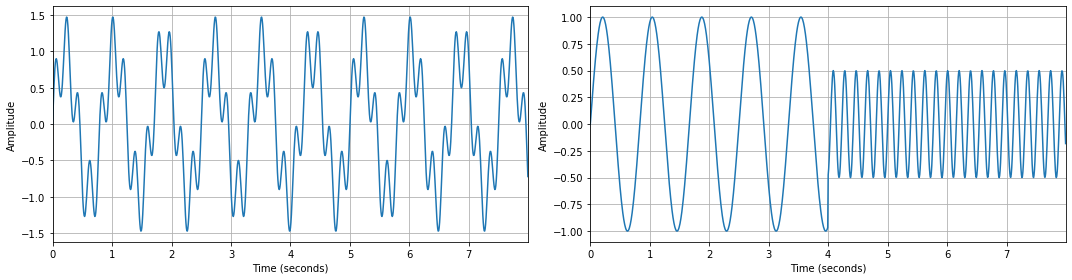

In [9]:
# parameters for sine wave
Fs = 128
f1 = 1.2
f2 = 5.2
duration = 8
N = int(duration * Fs)
amplitude1 = 1.0
amplitude2 = 0.5
t = np.linspace(0, duration, N, endpoint=False) # time variable
t1 = t[:N//2]
t2 = t[N//2:]

# Addition of 2 sine wave
x1 = amplitude1*np.sin(2*np.pi*f1*t)
x2 = amplitude2*np.sin(2*np.pi*f2*t)
x_add = x1 + x2               

# concatenate 2 sine waves
x1 = amplitude1 * np.sin(2 * np.pi * f1 * t1)
x2 = amplitude2 * np.sin(2 * np.pi * f2 * t2)
x_concat = np.concatenate((x1, x2))

# Visualize the 2 signals in time domain
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x_add)
plt.xlim([min(t), max(t)])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, x_concat)
plt.xlim([min(t), max(t)])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.grid(True)

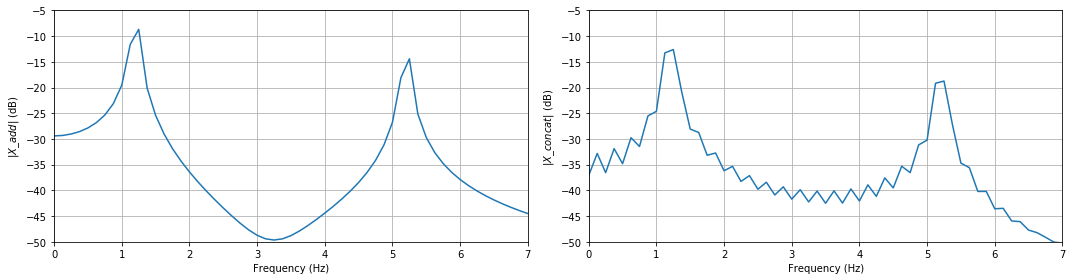

In [10]:
# Visualize the 2 signals in frequency domain
X_add = np.abs(np.fft.fft(x_add)) / N
freq = np.fft.fftfreq(N, d=1/Fs)
X_add = X_add[:N//2]
X_add_db = 20 * np.log10(X_add)
freq = freq[:N//2]

X_concat = np.abs(np.fft.fft(x_concat)) / N
X_concat = X_concat[:N//2]
X_concat_db = 20 * np.log10(X_concat)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(freq, X_add_db)
plt.xlim([0, 7])
plt.ylim([-50, -5])
plt.ylabel('$|X$_$add|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(freq, X_concat_db)
plt.xlim([0, 7])
plt.ylim([-50, -5])
plt.ylabel('$|X$_$concat|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.grid(True)

## Windowing
To analyze a signal across time we can use sliding windows. Let us see the effect of each type of window.

Rectangular window:


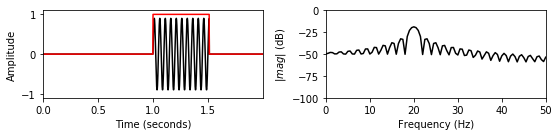

Triangular window:


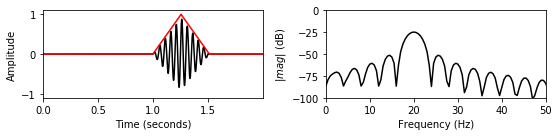

Hann window:


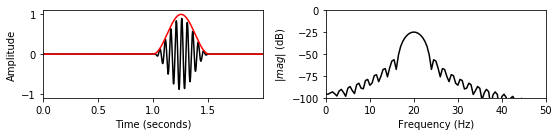

In [11]:
# example from [1]
duration = 2.0
Fs = 2000
f = 20
N = int(duration * Fs)
t = np.arange(N) / Fs
x = 0.9 * np.sin(2 * np.pi * f * t)

def windowed_ft(t, x, Fs, w_pos_sec, w_len, w_type):
    
    N = len(x)
    w_pos = int(Fs * w_pos_sec)
    w = np.zeros(N)
    w[w_pos:w_pos + w_len] = scipy.signal.get_window(w_type, w_len)
    x = x * w
    
    plt.figure(figsize=(8, 2))

    plt.subplot(1, 2, 1)
    plt.plot(t, x, c='k')
    plt.plot(t, w, c='r')
    plt.xlim([min(t), max(t)])
    plt.ylim([-1.1, 1.1])
    plt.ylabel('Amplitude')
    plt.xlabel('Time (seconds)')

    plt.subplot(1, 2, 2)
    X = np.abs(np.fft.fft(x)) / N 
    freq = np.fft.fftfreq(N, d=1/Fs)
    X = X[:N//2]
    X_mag = 20 * np.log10(X)
    freq = freq[:N//2]
    plt.plot(freq, X_mag, c='k')
    plt.xlim([0, 50])
    plt.ylim([-100, 0])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('$|mag|$ (dB)')
    plt.tight_layout()
    plt.show()
    
w_len = 1024
w_pos = 1280
print('Rectangular window:')
windowed_ft(t, x, Fs, 1.0, w_len, 'boxcar')
print('Triangular window:')
windowed_ft(t, x, Fs, 1.0, w_len, 'triang') 
print('Hann window:')
windowed_ft(t, x, Fs, 1.0, w_len, 'hann') 

#sinc function for rect window
#main and the side lobes should be visible

## Spectrogram

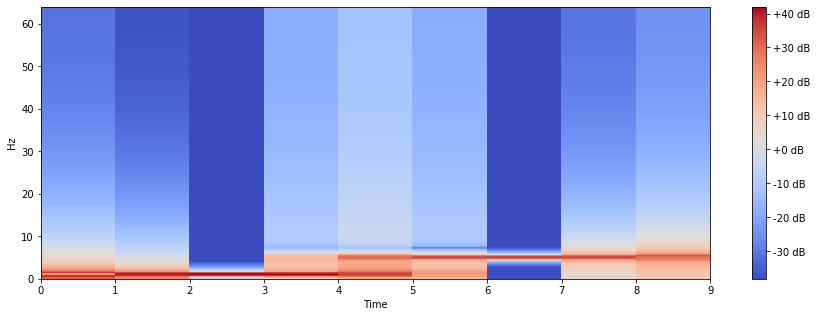

In [12]:
hop_length = 128
n_fft = 512
X = librosa.stft(x_concat, n_fft=n_fft, hop_length=hop_length)
S = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=128, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [13]:
# Exercise: What is the effect of changing the window and the hop size?

## Analyze instrument notes

In [14]:
ipd.Audio('audio/flute-c4.wav')

In [15]:
ipd.Audio('audio/bassoon-c4.wav')

In [16]:
flute_wav, Fs = librosa.load('audio/flute-c4.wav')
bassoon_wav, Fs = librosa.load('audio/bassoon-c4.wav')

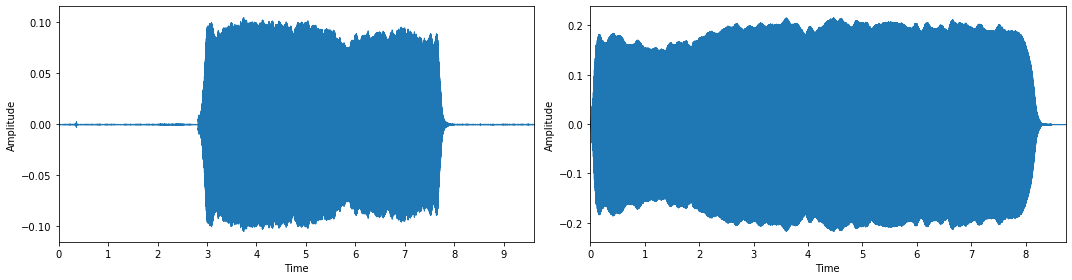

In [17]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
librosa.display.waveplot(flute_wav, sr=Fs)
plt.ylabel('Amplitude')
plt.subplot(1,2,2)
librosa.display.waveplot(bassoon_wav, sr=Fs)
plt.ylabel('Amplitude')
plt.tight_layout()

### Observations on instrument spectrums
Observe the difference between 2 peaks in the DFT spectrum above. It corresponds to the C4 note (262 Hz). Does the envelop of spectrum for both the instruments look different?

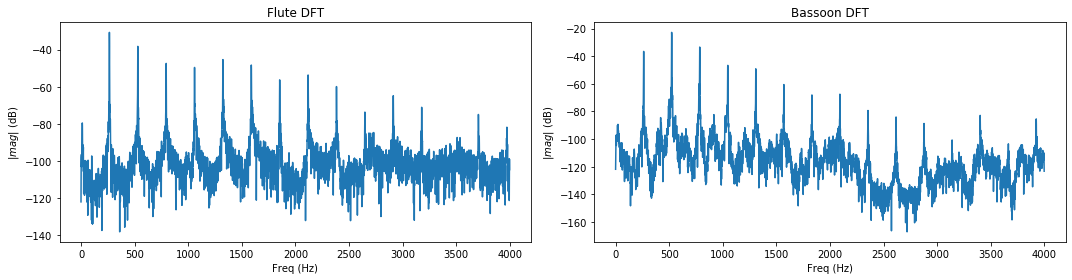

In [18]:
t1 = 4
t2 = 5
window = np.hanning((t2-t1)*Fs)
flute_fft = np.fft.rfft(flute_wav[int(t1*Fs):int(t2*Fs)] * window)
N = len(flute_fft)
flute_fft_magnitude = np.abs(flute_fft)/N
flute_mag_db = 20 * np.log10(flute_fft_magnitude)

bassoon_fft = np.fft.rfft(bassoon_wav[int(t1*Fs):int(t2*Fs)] * window)
N = len(bassoon_fft)
bassoon_fft_magnitude = np.abs(bassoon_fft)/N
bassoon_mag_db = 20 * np.log10(bassoon_fft_magnitude)

freqs = np.arange(int(Fs/2)+1)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(freqs[0:4000], flute_mag_db[0:4000])
plt.title('Flute DFT')
plt.xlabel('Freq (Hz)')
plt.ylabel('$|mag|$ (dB)')
plt.subplot(1,2,2)
plt.plot(freqs[0:4000], bassoon_mag_db[0:4000])
plt.title('Bassoon DFT')
plt.xlabel('Freq (Hz)')
plt.ylabel('$|mag|$ (dB)')
plt.tight_layout()

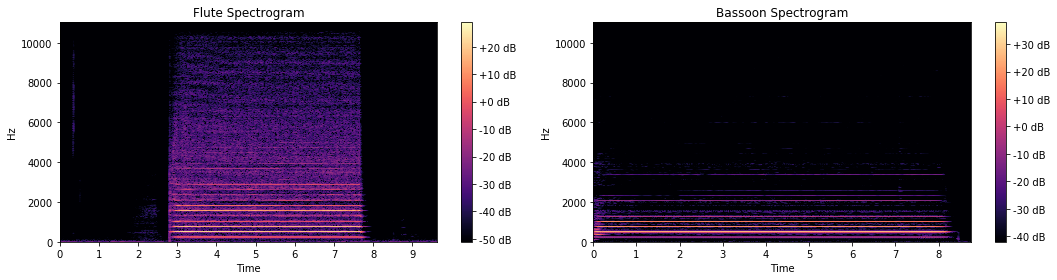

In [19]:
flute_stft = librosa.stft(flute_wav)
flute_db = librosa.amplitude_to_db(abs(flute_stft))
bassoon_stft = librosa.stft(bassoon_wav)
bassoon_db = librosa.amplitude_to_db(abs(bassoon_stft))

plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
librosa.display.specshow(flute_db, sr=Fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Flute Spectrogram')
plt.subplot(1,2,2)
librosa.display.specshow(bassoon_db, sr=Fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Bassoon Spectrogram')
plt.tight_layout()

In [20]:
# Exercise: Analyze and compare with Violin

In [21]:
# Question: Why is 1.25 Hz not seen as a single peak in the magnitude spectrum unlike 1 Hz?
# Hint: Scalloping loss: https://www.dsprelated.com/showarticle/1211.php

Fs = 16          
f = 1.25            
duration = 2     
amplitude = 1
t = np.linspace(0, duration, int(duration*Fs), endpoint=False) # time variable
x = amplitude*np.sin(2*np.pi*f*t)                # sine wave at 1 Hz

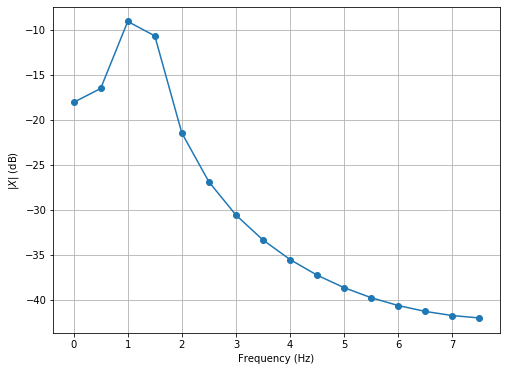

In [22]:
# Compute FFT of the sine wave
N = int(duration * Fs)
fft_mag = np.abs(np.fft.fft(x)) / N
fft_phase = np.angle(np.fft.fft(x))
freqs = np.fft.fftfreq(N, d=1/Fs)
fft_mag = fft_mag[:N//2]
fft_phase = fft_phase[:N//2]
freqs = freqs[:N//2]
fft_mag_db = 20 * np.log10(fft_mag)

# Plot the sine wave and FFT
plt.figure(figsize=(8, 6))
plt.plot(freqs, fft_mag_db, '-o')
plt.ylabel('$|X|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)

### Other Resources:
  [1] https://www.audiolabs-erlangen.de/resources/MIR/FMP/C0/C0.html
  
  [2] https://github.com/alexanderlerch/pyACA
  
  [3] https://www.audiolabs-erlangen.de/fau/professor/mueller/bookFMP/linkscode
  
  [4] DFT short refresher video: https://www.youtube.com/watch?v=mkGsMWi_j4Q
  